In [65]:
import numpy as np 
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [66]:
# Reading the data
dataset = pd.read_csv("Dataset/Desharnais.csv")
# dataset = pd.read_csv("Dataset/maxwell.arff.csv")
max_corr_features =  [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']


x=np.array(dataset[max_corr_features])

y=np.array(dataset['Effort'])

In [67]:
print(dataset.head())

   id  Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0   1        1        1           4       85      12    5152           253   
1   2        2        0           0       86       4    5635           197   
2   3        3        4           4       85       1     805            40   
3   4        4        0           0       86       5    3829           200   
4   5        5        0           0       86       4    2149           140   

   Entities  PointsNonAdjust  Adjustment  PointsAjust  Language  
0        52              305          34          302         1  
1       124              321          33          315         1  
2        60              100          18           83         1  
3       119              319          30          303         1  
4        94              234          24          208         1  


In [68]:
y.shape

(81,)

In [69]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(81,1))
y=scaler.fit_transform(y)

In [70]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 35)

In [71]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(x_train, y_train.ravel())
y_pred=regr.predict(x_test)


In [72]:
regr.fit(x_train, y_train)
print(regr.score(x_train,y_train))

0.7397349595850962


C:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [73]:
print(regr.score(x_test,y_test))

-3.942056977686039


In [74]:
y_pred=np.reshape(y_pred,(17,1))
y_test=np.reshape(y_test,(17,1))

In [75]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [76]:
y_pred

array([[0.13859345],
       [0.09246205],
       [0.26781978],
       [0.11964339],
       [0.06695298],
       [0.11067421],
       [0.51586296],
       [0.31943705],
       [0.0678056 ],
       [0.0722526 ],
       [0.06738281],
       [0.2480743 ],
       [0.44997948],
       [0.26527401],
       [0.14451923],
       [0.05106938],
       [0.23507202]])

In [77]:
y_test

array([[0.15499701],
       [0.07630162],
       [0.22351885],
       [0.11071215],
       [0.01286655],
       [0.14781568],
       [0.07719928],
       [0.15948534],
       [0.12507481],
       [0.10442849],
       [0.03081987],
       [0.19688809],
       [0.22800718],
       [0.17414722],
       [0.07390784],
       [0.0855775 ],
       [0.14392579]])

In [78]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [79]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.017954112442695316

RMSE:
 0.13399295669062353

MAPE:
 102.57414430174808

SMAPE:
 52.86

 Adj R2 score:
 0.6963574528492789


In [80]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [81]:
y_test=np.reshape(y_test,(17,))
y_pred=np.reshape(y_pred,(17,))

In [82]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual Effort  Predicted effort
0          4172.0       3788.255094
1          2331.0       2709.057155
2          5775.0       6811.375986
3          3136.0       3344.937387
4           847.0       2112.298012
5          4004.0       3135.112446
6          2352.0      12614.098080
7          4277.0       8018.910312
8          3472.0       2132.244230
9          2989.0       2236.277373
10         1267.0       2122.353499
11         5152.0       6349.450238
12         5880.0      11072.819879
13         4620.0       6751.820275
14         2275.0       3926.882913
15         2548.0       1740.716984
16         3913.0       6045.274755


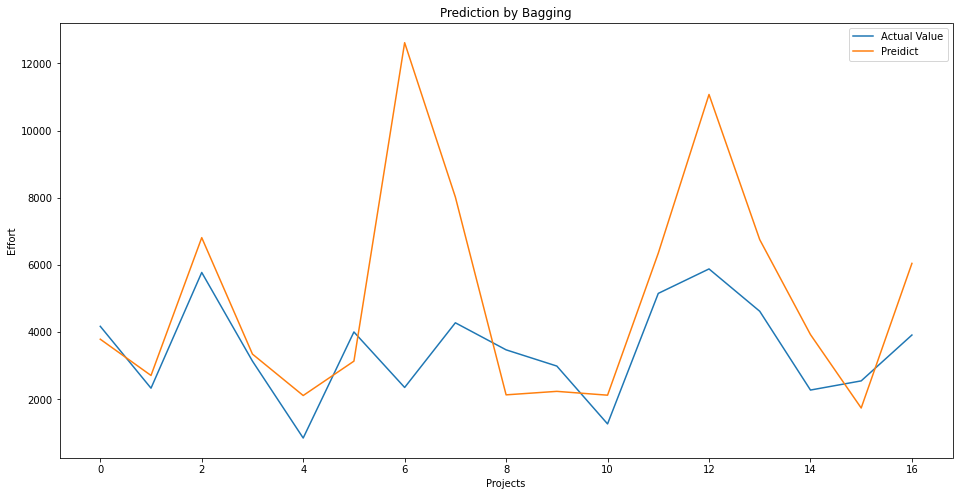

In [83]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Bagging")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()